<a href="https://colab.research.google.com/github/Kayalks/deep_learning/blob/main/image_classification/digits_recognition_minst_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras.utils
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab.patches import cv2_imshow
import seaborn as sns

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
cv2_imshow(X_train[0])

In [5]:
y_train[0]

5

In [6]:
## Normalizing the train and test sets
X_train = X_train/255
X_test = X_test/255


In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
## For simple NN flatten the input to form a 2D dataset
## Flattening the train and test set
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_test.reshape(len(X_test),28*28)

In [9]:
X_train_flatten.shape

(60000, 784)

In [10]:
## Building a simple ANN
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flatten,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4746 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3042 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2837 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2735 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9255


In [11]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2665 - accuracy: 0.9257


[0.2665180563926697, 0.9257000088691711]

In [12]:
y_pred = model.predict(X_test_flatten)
y_pred[0]

array([2.29395628e-02, 6.44904446e-07, 5.85179329e-02, 9.53695834e-01,
       2.76654959e-03, 1.07406795e-01, 1.51719223e-06, 9.99692500e-01,
       1.01036727e-01, 6.35652065e-01], dtype=float32)

In [13]:
#Mapping it into classes
y_pred_classes = [np.argmax(y) for y in y_pred]

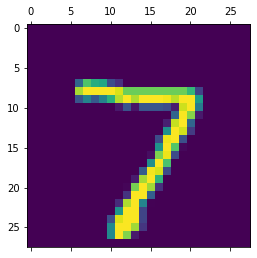

In [14]:
plt.matshow(X_test[0])

In [15]:
y_pred_classes[0]

7

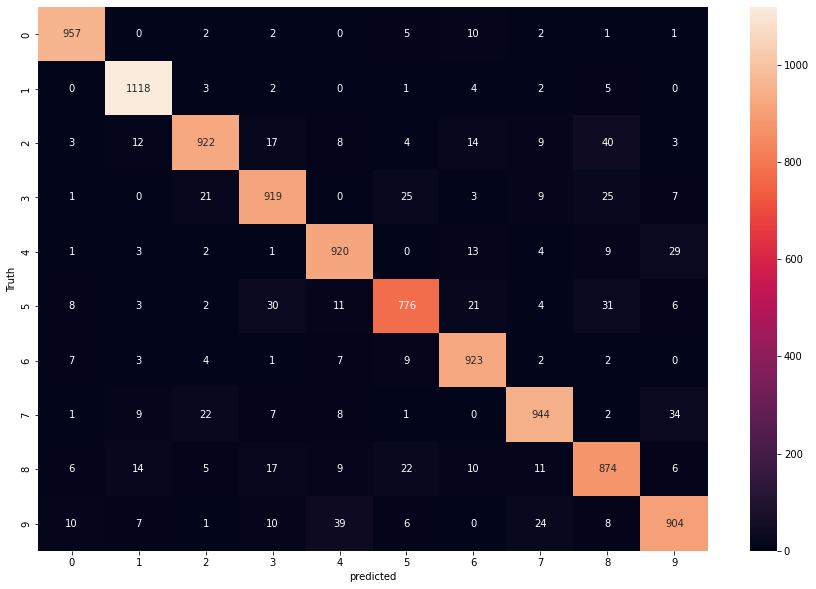

In [16]:
cm = confusion_matrix(y_test,y_pred_classes)

plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.show()

In [17]:
## Building with hidden layers on the normalised dataset without reshaping
model = keras.Sequential([
    layers.Flatten(input_shape = (28,28)),
    layers.Dense(100, input_shape=(784,), activation ='relu'),
    layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer ='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(X_train,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2759 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1227 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0857 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0658 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0519 - accuracy: 0.9840


In [18]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.9772


[0.07746268063783646, 0.9771999716758728]

In [19]:
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(y) for y in y_pred]

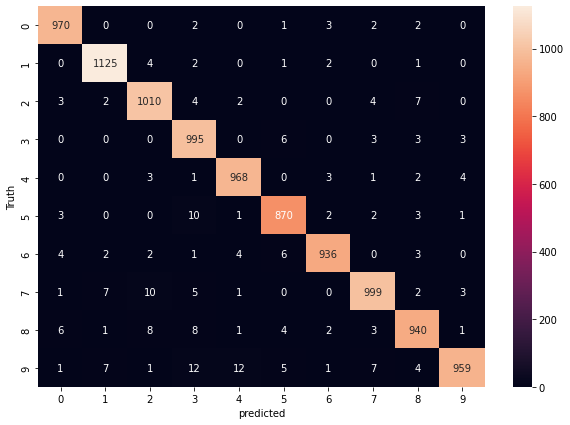

In [20]:
cm = confusion_matrix(y_test,y_pred_classes)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.show()

<Figure size 360x360 with 0 Axes>

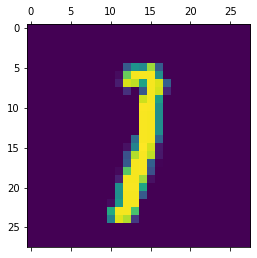

In [21]:
plt.figure(figsize=(5,5))
plt.matshow(X_test[2343])

In [22]:
y_pred_classes[2343]

1

In [23]:
## Building a CNN 

## Need to reshape the data to have 3 dimensions
X_train_reshaped = X_train.reshape(-1,28,28,1)
X_test_reshaped = X_test.reshape(-1,28,28,1)
X_train_reshaped.shape

(60000, 28, 28, 1)

In [24]:


model = keras.Sequential([
    #cnn layers
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    #Dense
    layers.Flatten(),
    layers.Dense(10,activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )
model.fit(X_train_reshaped,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2139 - accuracy: 0.9383
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0807 - accuracy: 0.9766
Epoch 3/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0620 - accuracy: 0.9817
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0510 - accuracy: 0.9847
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0450 - accuracy: 0.9867


In [25]:
model.evaluate(X_test_reshaped,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0549 - accuracy: 0.9831


[0.05490294098854065, 0.9830999970436096]

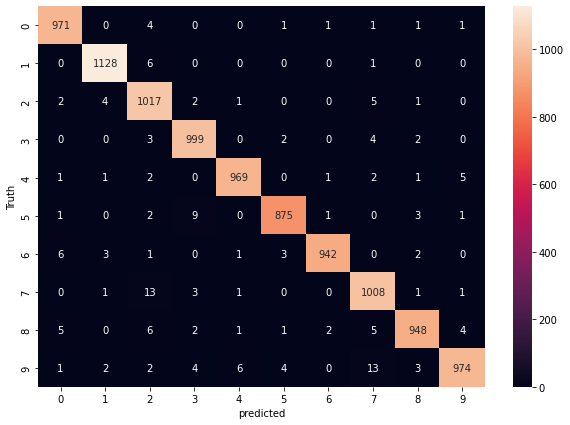

In [26]:
y_pred = model.predict(X_test_reshaped)
y_pred_classes = [np.argmax(y) for y in y_pred]

cm = confusion_matrix(y_test,y_pred_classes)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.show()

<Figure size 360x360 with 0 Axes>

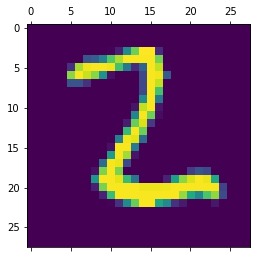

In [37]:
plt.figure(figsize=(5,5))
plt.matshow(X_test[7900])

In [39]:
y_pred_classes[7900]

1